# Random Variates

When we perform a fit or load and analysis result, the parmeters of our model become distributions in the AnalysisResults object. These are actaully instantiactions of the RandomVaraiates class.

While we have covered most of the functionality of RandomVariates in the AnalysisResults section, we want to highlight a few of the details here.


In [1]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
%%capture
import matplotlib.pyplot as plt
from threeML import *

In [3]:
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

Let's load back our fit of the line + gaussian from the AnalysisResults section.

In [4]:
ar = load_analysis_results("test_mle.fits")

When we display our fit, we can see the **parameter paths** of the model. What if we want specific information on a parameter(s)?

In [5]:
ar.display()

Best fit values:



,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.74 +/- 0.11,1 / (cm2 keV s)
fake.spectrum.main.composite.b_1,(10 +/- 4) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.F_2,(2.8 +/- 0.4) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.527 +/- 0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.08 +/- 0.10,keV



Correlation matrix:



1.00,-0.85,-0.05,0.02,-0.08
-0.85,1.00,0.00,-0.02,-0.01
-0.05,0.00,1.00,-0.31,-0.15
0.02,-0.02,-0.31,1.00,-0.11
-0.08,-0.01,-0.15,-0.11,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
sim_data,30.145596
total,30.145596



Values of statistical measures:



,statistical measures
AIC,71.654828
BIC,79.851307


Let's take a look at the normalization of the gaussian. To access the parameter, we take the parameter path, and we want to get the variates:

In [6]:
norm = ar.get_variates("fake.spectrum.main.composite.F_2")

Now, norm is a RandomVariate.

In [7]:
type(norm)

threeML.random_variates.RandomVariates

This is essentially a wrapper around numpy NDArray with a few added properties. It is an array of samples. In the MLE case, they are samples from the covariance matrix (this is not at all a marginal distribution, but the parameter "knows" about the entire fit, i.e., it is *not* a profile) and in the Bayesian case, these are samples from the posterior (this is a marginal).

The output representation for an RV are its 68% equal-tail and HPD uncertainties.

In [8]:
norm

equal-tail: (2.8 +/- 0.4) x 10, hpd: (2.8 +/- 0.4) x 10

We can access these directly, and to any desired confidence level.

In [9]:
norm.equal_tail_interval(cl=0.95)

(20.847835574953493, 36.02074863998851)

In [10]:
norm.highest_posterior_density_interval(cl=0.5)

(26.0861866176455, 31.356509482938716)

As stated above, the RV is made from samples. We can histogram them to show this explicitly.

Text(0.5, 0, 'norm')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


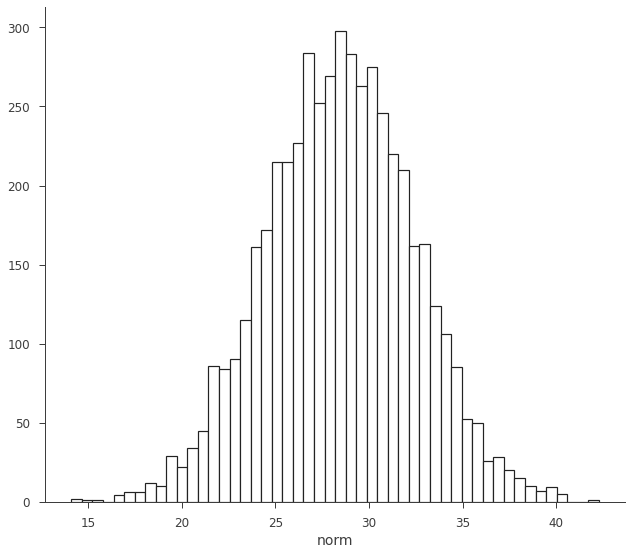

In [11]:
fig, ax = plt.subplots()

ax.hist(norm.samples, bins=50, ec="k", fc="w", lw=1.2)
ax.set_xlabel("norm")

We can easily transform the RV through propagation.

In [12]:
log_norm = np.log10(norm)
log_norm

equal-tail: 1.45 -0.06 +0.05, hpd: 1.45 +/- 0.06

Text(0.5, 0, 'log norm')

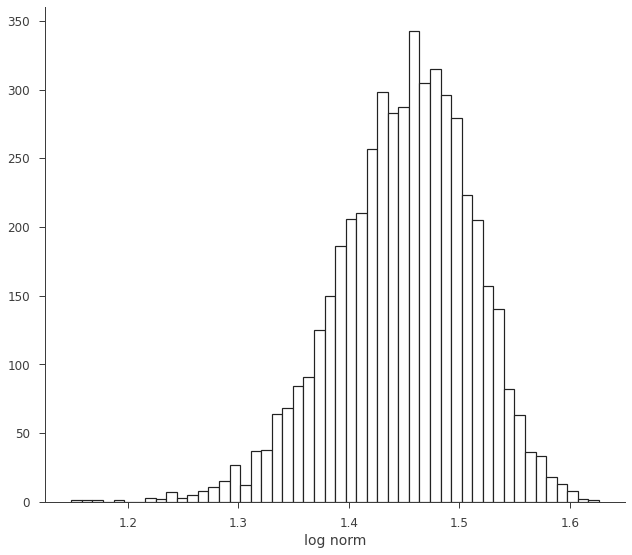

In [13]:
fig, ax = plt.subplots()

ax.hist(log_norm.samples, bins=50, ec="k", fc="w", lw=1.2)
ax.set_xlabel("log norm")